In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from skimage.io import imread , imshow
from skimage import color
from skimage import measure
import math

class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    ORIG = None
    WCSS = None
    pLABEL = None
    
    def __init__(self, image):
        self.IMAGE = image
        
    def dominantColors(self):
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS, init = 'k-means++', random_state = 0)
        kmeans.fit(self.IMAGE)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #find label of purple color
        self.pLABEL = kmeans.predict([[128,0,128]])
        #self.pLABEL = kmeans.predict([[150,255,127]])
        
        #returning after converting to integer from float
        return self.COLORS
    
    def show(self):
        imshow(self.ORIG)
        
    def elbow(self):
        #read image
        img = cv2.imread(self.IMAGE)
        
        #convert to rgb from bgr
        #img = color.rgb2hsv(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        self.ORIG = img.copy()
            
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #Elbow method
        wcss = []
        for i in range(1, 10):
            kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
            kmeans.fit(self.IMAGE)
            wcss.append(kmeans.inertia_)
        self.WCSS = wcss
        plt.plot(range(1, 10), wcss)
        plt.title('The Elbow Method')
        plt.xlabel('Number of clusters')
        plt.ylabel('WCSS')
        plt.show()
        
    def findK(self):
        m = (self.WCSS[0]-self.WCSS[8])/(1-9)
        c = self.WCSS[0]-m*1
        A=m
        B=-1
        maxD = 0
        K = 0
        for x1,y1 in enumerate(self.WCSS,1):
            d = abs(A*x1+B*y1+c)/math.sqrt(A**2+B**2)
            if d > maxD:
                maxD = d
                self.CLUSTERS=x1+1
        print('found :'+str(self.CLUSTERS)+' group')
        return self.CLUSTERS

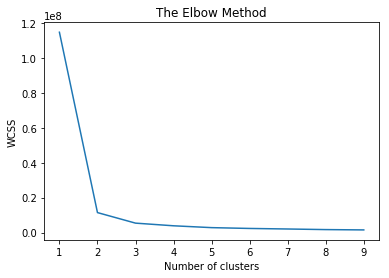

found :3 group


array([[252, 251, 195],
       [253, 255, 180],
       [254, 255, 185],
       ...,
       [255, 255, 237],
       [255, 254, 242],
       [255, 254, 250]], dtype=uint8)

In [2]:
img = 'segmentation_WBC-master/Dataset 1/073.bmp'
dc = DominantColors(img) 
dc.elbow()
dc.findK()
dc.IMAGE

C:\Users\58011256\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\58011256\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


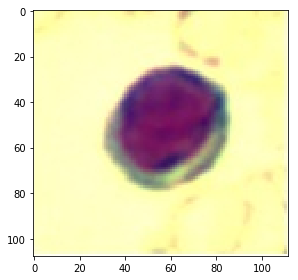

In [3]:
dc.dominantColors()
dc.show()

In [4]:
dc.COLORS

array([[253.66000612, 253.07370782, 184.59272097],
       [104.68778576,  37.90725016, 101.54539517],
       [153.4047619 , 151.50529101, 129.61904762]])

In [5]:
dc.LABELS
new = np.reshape(dc.LABELS, (-1, dc.ORIG.shape[1]))

In [6]:
new

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
dc.pLABEL[0]
new.shape[0]

108

C:\Users\58011256\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\58011256\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
C:\Users\58011256\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


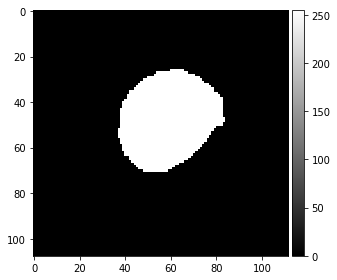

In [8]:
for i in range(0,new.shape[0]):
    for j in range(0,new.shape[1]):
        if new[i][j] == dc.pLABEL[0]:
            new[i][j] = 255
        else:
            new[i][j] = 0
imshow(new,cmap='gray')

In [9]:
new

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])